In [1]:
!pip install -r /content/drive/MyDrive/AI-Project/requirments.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [24]:
import pandas as pd
import numpy as np

# Change the PATH
DATASET_PATH = '/content/drive/MyDrive/AI-Project/GNN-Data-AI'

def create_normalized_adjacency_matrix(edges):
    # Ensure node identifiers are treated as strings
    edges['Inlet Node'] = edges['Inlet Node'].astype(str)
    edges['Outlet Node'] = edges['Outlet Node'].astype(str)

    # Creating a set of all unique nodes
    nodes = sorted(set(edges['Inlet Node']).union(set(edges['Outlet Node'])))

    # Mapping nodes to indices in the adjacency matrix
    node_to_index = {node: i for i, node in enumerate(nodes)}

    # Initializing the adjacency matrix with zeros
    adjacency_matrix = np.zeros((len(nodes), len(nodes)))

    # Filling the adjacency matrix with edge lengths
    for _, row in edges.iterrows():
        i = node_to_index[row['Inlet Node']]
        j = node_to_index[row['Outlet Node']]
        adjacency_matrix[i, j] = row['Length (ft)']

    # Normalizing the distances
    max_distance = np.max(adjacency_matrix[adjacency_matrix > 0])
    normalized_matrix = np.where(adjacency_matrix > 0, adjacency_matrix / max_distance, 0)

    return nodes, normalized_matrix


# Adjust the file_path as needed for your Jupyter environment
file_path = DATASET_PATH + '/WW01_pipe.csv'
edges_data = pd.read_csv(file_path)

# Create and normalize the adjacency matrix, receiving nodes and the matrix itself
nodes, normalized_matrix = create_normalized_adjacency_matrix(edges_data)


# Convert the normalized adjacency matrix into a DataFrame, applying formatting
adjacency_df = pd.DataFrame(normalized_matrix, index=nodes, columns=nodes).astype(float)

# Adjust the output_file_path as needed for your environment
output_file_path = DATASET_PATH + '/adjacency_matrix.csv'

adjacency_df.to_csv(output_file_path)

print(f"Normalized adjacency matrix with node IDs has been saved to: {output_file_path}")

# Load the saved adjacency matrix to verify
saved_df = pd.read_csv(output_file_path, index_col=0)

# Display a small part of the saved normalized adjacency matrix
print("Normalized adjacency matrix with node IDs:")
display(saved_df.head())

Normalized adjacency matrix with node IDs has been saved to: /content/drive/MyDrive/AI-Project/GNN-Data-AI/adjacency_matrix.csv
Normalized adjacency matrix with node IDs:


,92090040,92090041,92090042,92090070,92090090,92090100,92100100,92100110,92100120,92100130,...,92100190,92100220,92100230,92100240,92100250,92100260,92100280,92100300,92100320,OF-1
92090040,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.43928
92090041,0.183692,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
92090042,0.101067,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
92090070,0.000000,0.0,0.000000,0.0,0.033898,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
92090090,0.000000,0.0,0.468007,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000


In [25]:
import pandas as pd

def clean_csv(data):
    # Identify columns to drop
    columns_to_drop = []
    for column in data.columns:
        # Remove columns that are entirely empty or contain only NA values
        if data[column].isnull().all() or data[column].dropna().empty:
            columns_to_drop.append(column)
        # Remove columns where all values are the same
        elif data[column].nunique() <= 1:
            columns_to_drop.append(column)

    # Drop identified columns
    cleaned_data = data.drop(columns=columns_to_drop)
    return cleaned_data

# Load the CSV file
file_path = DATASET_PATH + '/WW01_node.csv'
data = pd.read_csv(file_path)
data[' Node ID'] = data[' Node ID'].astype(str)

print("Before cleaning:")
display(data.head())

# Clean the data
cleaned_data = clean_csv(data)
cleaned_data.to_csv(DATASET_PATH + '/static_node.csv',index=False)
# Display the first few rows after cleaning
print("\nAfter cleaning:")
display(cleaned_data.head())


Before cleaning:


,Node ID,X-Coordinate,Y-Coordinate,Tag,Inflows,Treatment,Invert Elev. (ft),Rim Elev. (ft),Depth (ft),Initial Depth (ft),...,Hours Flooded (h),Max. Flood Rate (cfs),Total Flood Vol. (MG),Max. Pond Vol. (1000 ft³),Contributing Area (ac),Contributing Imp. Area (ac),Max. Unit Flow (cfs/ac),GIS_LENGTH (m),GIS_AREA (m²),GIS_PARTS
0,92090040,1363636.245,17150253.45,NaN,YES,NO,-5.54,15.00,20.54,0,...,0,0,0,0,0,0,0,0,0,1
1,92090041,1363608.069,17150358.10,NaN,YES,NO,-5.18,15.00,20.18,0,...,0,0,0,0,0,0,0,0,0,1
2,92090042,1363690.362,17150228.40,NaN,YES,NO,-5.39,14.91,20.30,0,...,0,0,0,0,0,0,0,0,0,1
3,92090070,1363949.469,17150130.86,NaN,YES,NO,-4.63,14.07,18.70,0,...,0,0,0,0,0,0,0,0,0,1
4,92090090,1363941.085,17150112.70,NaN,YES,NO,-4.70,14.01,18.71,0,...,0,0,0,0,0,0,0,0,0,1



After cleaning:


,Node ID,X-Coordinate,Y-Coordinate,Invert Elev. (ft),Rim Elev. (ft),Depth (ft),Avg. Depth (ft),Max. Depth (ft),Max. HGL (ft),Time Max. HGL (M/D/Y),Rep. Max. Depth (ft),Max. Lat. Inflow (cfs),Max. Total Inflow (cfs),Total Lat. Inflow (MG),Total inflow (MG),Min. Freeboard (ft)
0,92090040,1363636.245,17150253.45,-5.54,15.00,20.54,0.20,0.26,-5.28,1/1/00 7:45,0.26,0.01,0.13,0.007,0.106,20.28
1,92090041,1363608.069,17150358.10,-5.18,15.00,20.18,0.04,0.05,-5.13,1/1/00 7:31,0.05,0.01,0.01,0.007,0.007,20.13
2,92090042,1363690.362,17150228.40,-5.39,14.91,20.30,0.17,0.22,-5.17,1/1/00 7:45,0.22,0.01,0.11,0.007,0.092,20.08
3,92090070,1363949.469,17150130.86,-4.63,14.07,18.70,0.05,0.06,-4.57,1/1/00 7:31,0.06,0.01,0.01,0.007,0.007,18.64
4,92090090,1363941.085,17150112.70,-4.70,14.01,18.71,0.17,0.21,-4.49,1/1/00 7:45,0.21,0.01,0.10,0.007,0.085,18.50


In [26]:
import pandas as pd
import os

def read_values_from_dat_file(dat_file_path):
    """Reads values from a .dat file and returns them as a list."""
    try:
        data = pd.read_csv(dat_file_path, sep='\t', comment=';', header=None, names=['Time', 'Value'])
        return data['Value'].tolist()
    except FileNotFoundError:
        print(f"File not found: {dat_file_path}")
        return None

# Update these paths based on your notebook's environment
source_csv_path = DATASET_PATH + '/source_dynamic_feature_inflow.csv'
dat_files_dir = os.path.dirname(source_csv_path)

# Reading the source CSV file
source_df = pd.read_csv(source_csv_path)

# Creating a dictionary to hold data for the new CSV file
data_dict = {}
max_length = 0

# Iterating over each row in the source CSV
for _, row in source_df.iterrows():
    node_id = row['Name']
    dat_filename = row['Time Series'] + '.dat'
    dat_file_path = os.path.join(DATASET_PATH + '/WW01_v3/Inflow Time Series_v3', dat_filename)

    # Read values from the .dat file
    values = read_values_from_dat_file(dat_file_path)
    if values:
        data_dict[node_id] = values
        max_length = max(max_length, len(values))

# Padding shorter arrays with 0
for node_id in data_dict:
    length_diff = max_length - len(data_dict[node_id])
    if length_diff > 0:
        data_dict[node_id].extend([0] * length_diff)

# Creating a DataFrame from the dictionary
new_df = pd.DataFrame.from_dict(data_dict)

display(new_df.head())

# Saving the new DataFrame to a CSV file
new_csv_path = os.path.join(dat_files_dir, DATASET_PATH + '/dynamic-feature-inflow.csv')
new_df.to_csv(new_csv_path, index=False)
print(f"Output CSV file created at {new_csv_path}")


,92100320,92100120,92100190,92100260,92100280,92100240,92100220,92100170,92100100,92100130,...,92100230,92100150,92100300,92090040,92090041,92090042,92090090,92090070,92090100,OF-1
0,0.002986,0.000515,0.000515,0.001744,0.000531,0.002166,0.002731,0.005126,0.001338,0.001606,...,0.001655,0.001816,0.000266,0.000415,0.003112,0.002538,0.002783,0.001385,0.000156,0.000415
1,0.002986,0.000515,0.000515,0.001744,0.000531,0.001760,0.002222,0.004165,0.001338,0.001606,...,0.001655,0.001816,0.000220,0.000415,0.002540,0.002389,0.001670,0.000831,0.000130,0.000415
2,0.002834,0.000489,0.000489,0.001640,0.000499,0.001353,0.001713,0.003204,0.000000,0.001540,...,0.001659,0.001608,0.000174,0.000417,0.001967,0.002090,0.001113,0.000554,0.000104,0.000417
3,0.002834,0.000489,0.000489,0.001640,0.000499,0.001083,0.001365,0.002563,0.000000,0.001540,...,0.001659,0.001608,0.000133,0.000417,0.001556,0.002090,0.000835,0.000416,0.000078,0.000417
4,0.002683,0.000463,0.000463,0.001540,0.000469,0.000812,0.001044,0.001922,0.000000,0.001469,...,0.001664,0.001516,0.000124,0.000418,0.001232,0.002389,0.000835,0.000416,0.000078,0.000418


Output CSV file created at /content/drive/MyDrive/AI-Project/GNN-Data-AI/dynamic-feature-inflow.csv


# **Graph Structure**

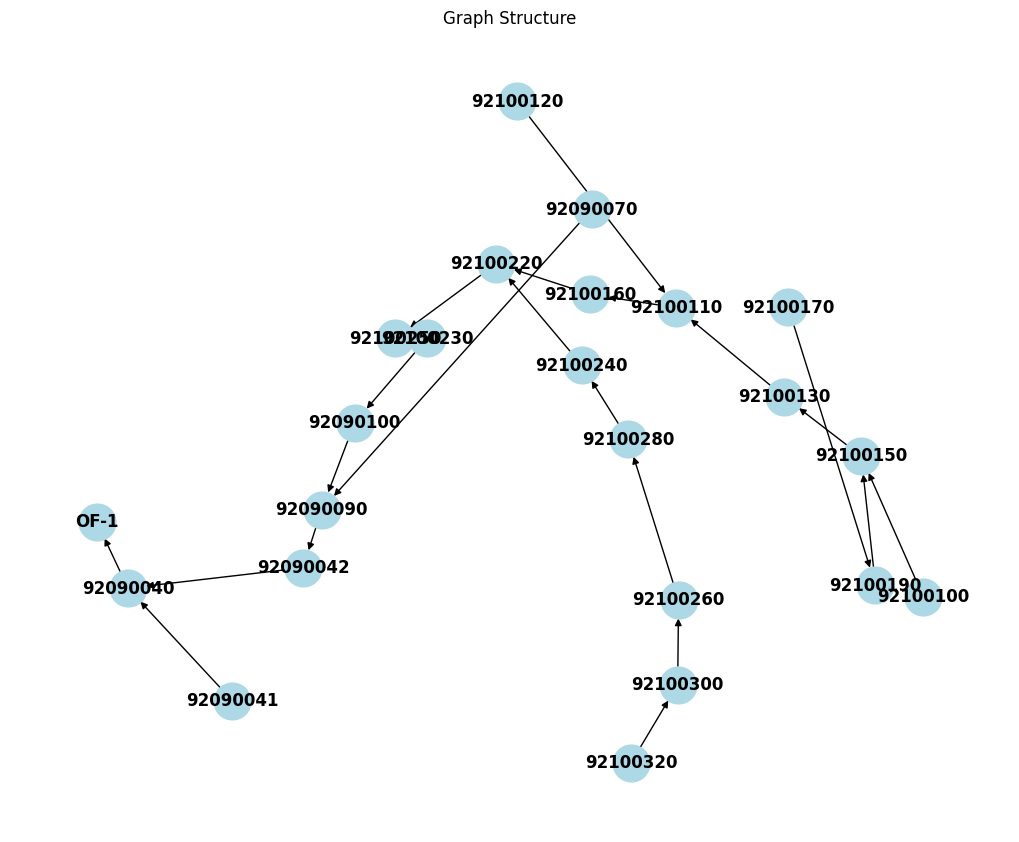

In [27]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the adjacency matrix
adj_matrix_path = DATASET_PATH + '/adjacency_matrix.csv'
adj_matrix = pd.read_csv(adj_matrix_path, index_col=0)

# Create a directed graph from the adjacency matrix
G = nx.from_pandas_adjacency(adj_matrix, create_using=nx.DiGraph)

# Draw the graph
plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_size=700, node_color="lightblue",
        arrows=True, font_weight="bold")
plt.title("Graph Structure")
plt.show()


# **Static Features Distribution**

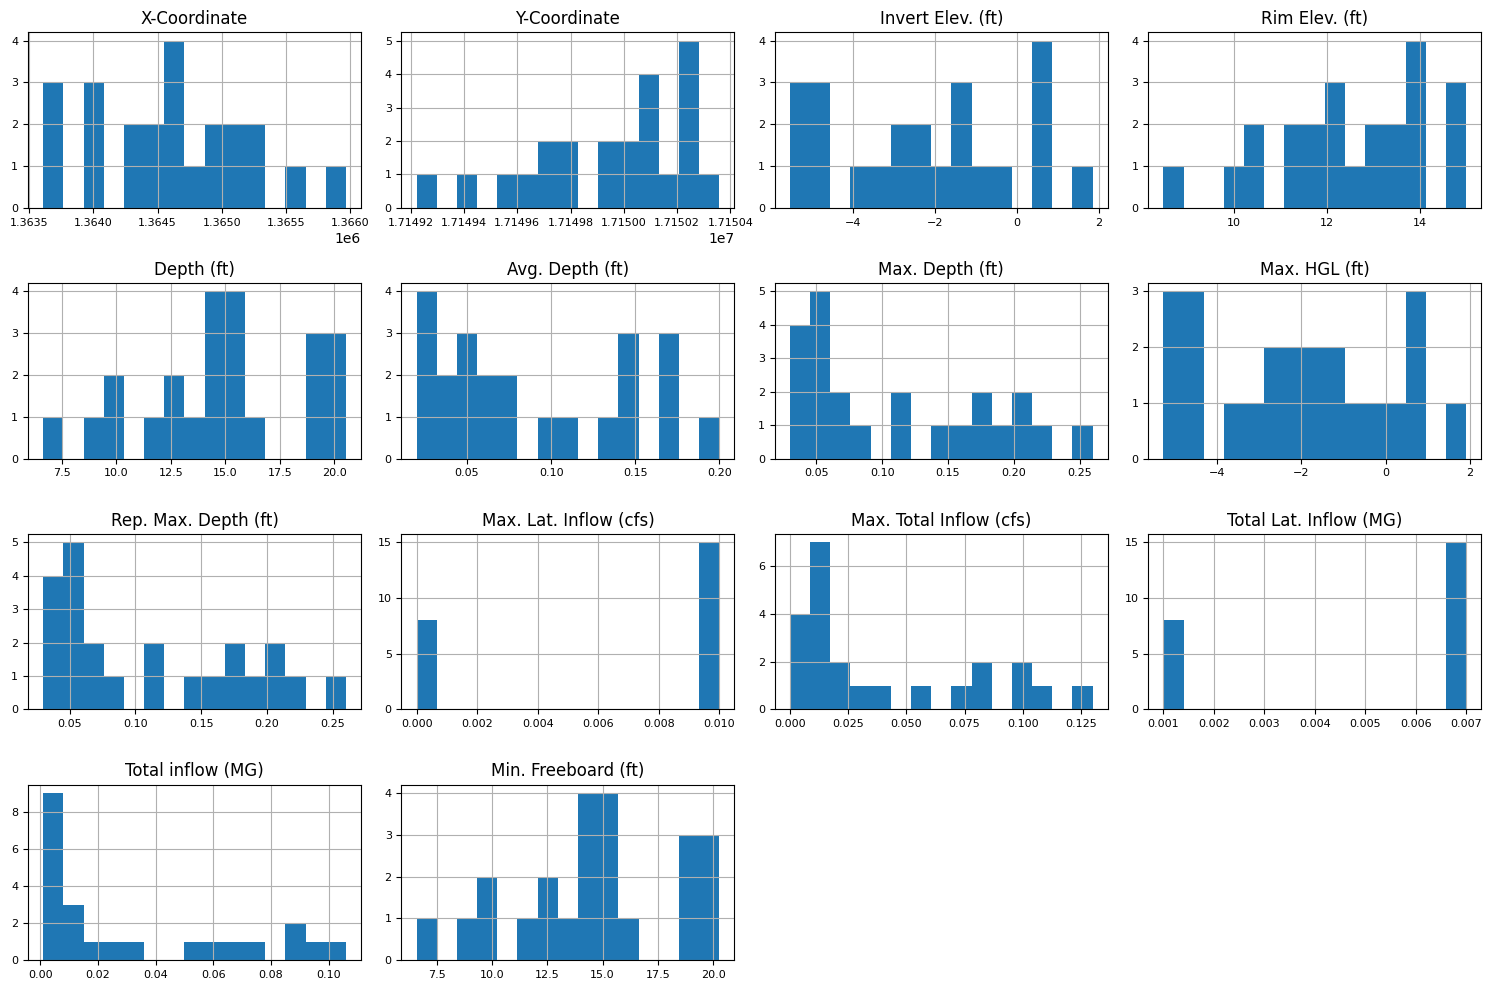

In [28]:
import pandas as pd
import seaborn as sns

# Load the node static features
static_features_path = DATASET_PATH + '/static_node.csv'
static_features = pd.read_csv(static_features_path)

# Plot histograms for each static feature
static_features.drop(' Node ID', axis=1).hist(figsize=(15, 10), bins=15, layout=(4, 4), xlabelsize=8, ylabelsize=8)
plt.tight_layout()
plt.show()


# **Plot Time Series Data for Depth**

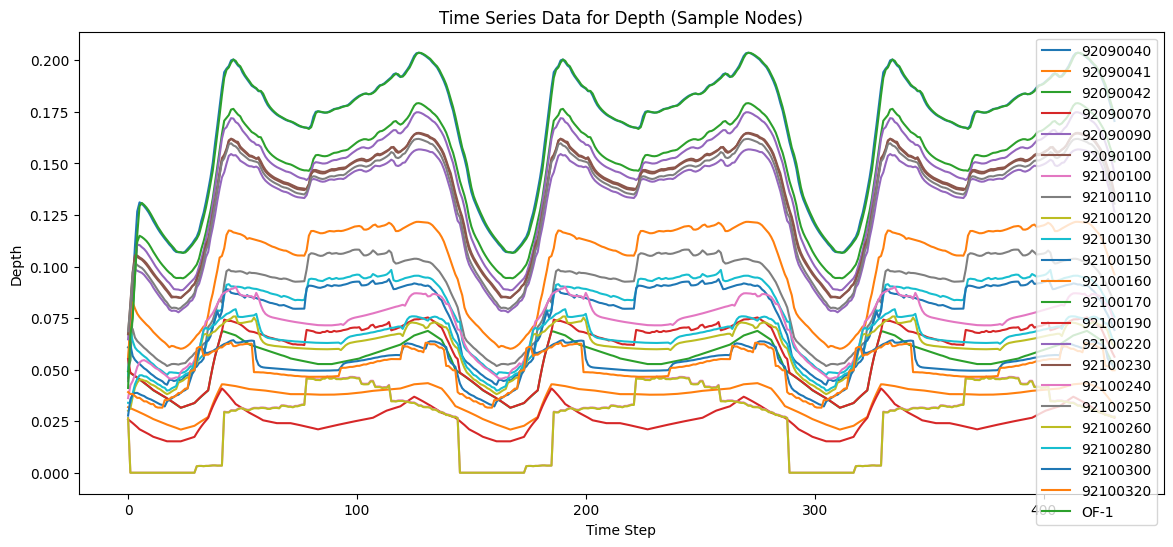

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dynamic feature (depth) time series data
depth_ts_path = DATASET_PATH + '/dynamic-feature-depth.csv'
depth_ts = pd.read_csv(depth_ts_path)

# Plot time series for a subset of nodes
plt.figure(figsize=(14, 6))
for column in depth_ts.columns[:]:
    plt.plot(depth_ts.index, depth_ts[column], label=column)

plt.xlabel("Time Step")
plt.ylabel("Depth")
plt.title("Time Series Data for Depth (Sample Nodes)")
plt.legend()
plt.show()


# **Plot Time Series Data for Inflow**

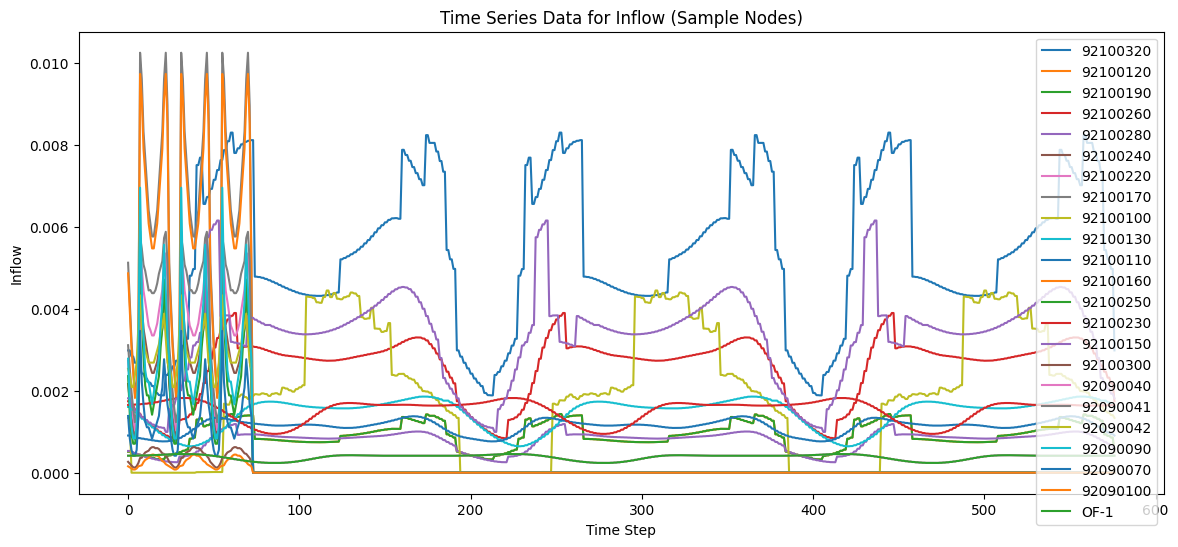

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dynamic feature (inflow) time series data
inflow_ts_path = DATASET_PATH + '/dynamic-feature-inflow.csv'
inflow_ts = pd.read_csv(inflow_ts_path)

# Plot time series for a subset of nodes
plt.figure(figsize=(14, 6))
for column in inflow_ts.columns[:]:  # Adjust based on the number of nodes you want to plot
    plt.plot(inflow_ts.index, inflow_ts[column], label=column)

plt.xlabel("Time Step")
plt.ylabel("Inflow")
plt.title("Time Series Data for Inflow (Sample Nodes)")
plt.legend()
plt.show()


# **Data PreProcessing**

In [31]:
import numpy as np
import pandas as pd

# adjacency_matrix is a numpy array of shape (24, 24)
# Remove the first row and column
adjacency_matrix_df = pd.read_csv(DATASET_PATH +'/adjacency_matrix.csv')
# Drop the first column
adjacency_matrix_df.drop(adjacency_matrix_df.columns[0], axis=1, inplace=True)

adjacency_matrix_np = adjacency_matrix_df.values.astype(float)


# Now, adjacency_matrix_preprocessed is of shape (23, 23) and ready for the GNN.

static_features = pd.read_csv(DATASET_PATH + '/static_node.csv')
# If the first column is 'node_id', we'll leave it as is for now, assuming it might be useful for indexing or mapping later.
# Just ensure all other features are numeric and ready for the model.
# Identify non-numeric columns, excluding 'Node ID'
non_numeric_columns = static_features.select_dtypes(exclude=['number', 'bool']).columns
non_numeric_columns = non_numeric_columns.drop(' Node ID')  # Ensure 'Node ID' is not in the list to drop

# Drop the identified non-numeric columns
static_features_numeric = static_features.drop(columns=non_numeric_columns)

dynamic_depth = pd.read_csv(DATASET_PATH + '/dynamic-feature-depth.csv')
dynamic_inflow = pd.read_csv(DATASET_PATH + '/dynamic-feature-inflow.csv')

# Truncate dynamic_inflow to match dynamic_depth's length
dynamic_inflow_truncated = dynamic_inflow.iloc[:len(dynamic_depth)]

# Verify if truncation was successful
assert len(dynamic_inflow_truncated) == len(dynamic_depth), "Inflow data not correctly truncated"
# Let's first truncate the inflow_data to match depth_data's size
inflow_data_truncated = dynamic_inflow.iloc[:432]



In [9]:
import torch
from torch_geometric.utils import dense_to_sparse


adjacency_matrix_tensor = torch.tensor(adjacency_matrix_np, dtype=torch.float)

# Convert the dense adjacency matrix to a sparse edge_index
edge_index, edge_weight = dense_to_sparse(adjacency_matrix_tensor)
# Convert static features to tensor (excluding the 'Node ID' column if present)
static_features_tensor = torch.tensor(static_features_numeric.drop(columns=[' Node ID'], errors='ignore').values, dtype=torch.float)


def create_sequences(data, sequence_length=5):
    """
    Creates sequences with the desired shape (num_samples, num_nodes, sequence_length).

    Parameters:
    - data: A numpy array of shape (num_samples, num_nodes).
    - sequence_length: The number of previous timesteps to include in each input sequence.

    Returns:
    - inputs: A numpy array of shape (num_samples - sequence_length, num_nodes, sequence_length), containing input sequences.
    - targets: A numpy array of shape (num_samples - sequence_length, num_nodes, sequence_length), containing target sequences.
    """
    num_samples, num_nodes = data.shape
    inputs, targets = [], []
    for i in range(num_samples - sequence_length):
        # Select the sequence for each node, preserving the (num_nodes, sequence_length) shape
        inputs.append(data[i:i + sequence_length, :].transpose())
        targets.append(data[i + 1:i + 1 + sequence_length, :].transpose())
    return np.array(inputs), np.array(targets)


# Create sequences
depth_inputs, depth_targets = create_sequences(dynamic_depth.values, sequence_length=5)
inflow_inputs, inflow_targets = create_sequences(dynamic_inflow_truncated.values, sequence_length=5)


# Convert to tensors
depth_inputs_tensor = torch.tensor(depth_inputs, dtype=torch.float)
depth_targets_tensor = torch.tensor(depth_targets, dtype=torch.float)
inflow_inputs_tensor = torch.tensor(inflow_inputs, dtype=torch.float)
inflow_targets_tensor = torch.tensor(inflow_targets, dtype=torch.float)


def calculate_split_indices(total_samples, train_frac=0.7, test_frac=0.2, val_frac=0.1):
    train_end = int(total_samples * train_frac)
    test_end = train_end + int(total_samples * test_frac)
    return train_end, test_end

total_samples = len(depth_inputs)
train_end, test_end = calculate_split_indices(total_samples)

def split_data(inputs, targets, train_end, test_end):
    train_inputs, train_targets = inputs[:train_end], targets[:train_end]
    test_inputs, test_targets = inputs[train_end:test_end], targets[train_end:test_end]
    val_inputs, val_targets = inputs[test_end:], targets[test_end:]
    return train_inputs, train_targets, test_inputs, test_targets, val_inputs, val_targets

depth_train_inputs, depth_train_targets, depth_test_inputs, depth_test_targets, depth_val_inputs, depth_val_targets = split_data(depth_inputs_tensor, depth_targets_tensor, train_end, test_end)
inflow_train_inputs, inflow_train_targets, inflow_test_inputs, inflow_test_targets, inflow_val_inputs, inflow_val_targets = split_data(inflow_inputs_tensor, inflow_targets_tensor, train_end, test_end)



In [12]:
from torch.utils.data import Dataset, DataLoader


class GraphTimeSeriesDataset(Dataset):
    def __init__(self, static_features, depth_inputs, depth_targets, inflow_inputs, inflow_targets):
        self.static_features = static_features
        self.depth_inputs = depth_inputs
        self.depth_targets = depth_targets
        self.inflow_inputs = inflow_inputs
        self.inflow_targets = inflow_targets

    def __len__(self):
        return len(self.depth_inputs)

    def __getitem__(self, idx):
        return (self.static_features,
                self.depth_inputs[idx], self.depth_targets[idx],
                self.inflow_inputs[idx], self.inflow_targets[idx])

train_dataset = GraphTimeSeriesDataset(static_features_tensor, depth_train_inputs, depth_train_targets, inflow_train_inputs, inflow_train_targets)
test_dataset = GraphTimeSeriesDataset(static_features_tensor, depth_test_inputs, depth_test_targets, inflow_test_inputs, inflow_test_targets)
val_dataset = GraphTimeSeriesDataset(static_features_tensor, depth_val_inputs, depth_val_targets, inflow_val_inputs, inflow_val_targets)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


# **STGM Model**

In [17]:
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from pytorch_tcn import TCN

class STGM(nn.Module):
    def __init__(self, num_static_features, num_dynamic_features, look_back, num_nodes, embedding_size=16):
        super(STGM, self).__init__()
        self.gcn = GCNConv(num_static_features, embedding_size)
        self.bn_gcn = nn.BatchNorm1d(embedding_size)  # BatchNorm for the output of GCN

        # TCNs for dynamic feature processing, each TCN dedicated to one dynamic feature
        self.tcns = nn.ModuleList([
            TCN(num_inputs=1, num_channels=[32, 16], kernel_size=4, dropout=0.2)
            for _ in range(num_dynamic_features)
        ])

        # Layer normalization after TCNs, one for each dynamic feature pathway
        self.ln_tcns = nn.ModuleList([nn.LayerNorm(16) for _ in range(num_dynamic_features)])

        # Separate output layers for each set of dynamic features, without combining them
        self.output_layers = nn.ModuleList([
            nn.Linear(embedding_size + 16 * look_back , 5)  # Output layer for each dynamic feature
            for _ in range(num_dynamic_features)
        ])

    def forward(self, x_static, edge_index, dynamic_features_list, num_nodes):
        # Process static features through GCN and batch normalization
        x_static = self.gcn(x_static, edge_index)
        x_static = F.relu(self.bn_gcn(x_static.transpose(1, 2)).transpose(1, 2))

        # Initialize a list to hold outputs from each dynamic feature's pathway
        outputs = []

        for idx, dynamic_features in enumerate(dynamic_features_list):
            tcn = self.tcns[idx]  # Select corresponding TCN for this dynamic feature
            processed_dynamic_features = []

            for node_idx in range(num_nodes):
                # Select dynamic features for the current node, maintaining temporal dimension
                node_features = dynamic_features[:, node_idx, :].unsqueeze(1)
                node_dynamic = tcn(node_features)  # Process through TCN
                # Apply layer normalization directly without temporal aggregation
                node_dynamic_ln = self.ln_tcns[idx](node_dynamic.transpose(1, 2)).transpose(1, 2)
                # Flatten the output for the linear layer
                node_dynamic_flattened = node_dynamic_ln.reshape(node_dynamic_ln.size(0), -1)
                processed_dynamic_features.append(node_dynamic_flattened)

            # Concatenate processed features for all nodes
            dynamic_features_processed = torch.stack(processed_dynamic_features, dim=1)
            # Combine with static features and pass through the dedicated output layer
            x_combined = torch.cat((x_static, dynamic_features_processed), dim=2)
            output = self.output_layers[idx](F.relu(x_combined))
            outputs.append(output)

        return outputs


# **Training**

**Define Custom Datasets and Create DataLoaders**

**Model Initialization & Training**

In [18]:
model = STGM(num_static_features=static_features_tensor.shape[1],
             num_dynamic_features=len([depth_train_inputs, inflow_train_inputs]),
             look_back=5,
             num_nodes=static_features_tensor.shape[0])

class RMSELoss(nn.Module):
    def __init__(self):
        super().__init__()
        self.mse = nn.MSELoss()

    def forward(self, predicted, target):
        return torch.sqrt(self.mse(predicted, target))


optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay = 1e-4)
criterion = RMSELoss()  # Change depending on your task
num_epochs = 100
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    total_loss = 0

    for static_features, depth_inputs, depth_targets, inflow_inputs, inflow_targets in train_loader:
        optimizer.zero_grad()

        # Concatenate dynamic features for the model input, if necessary
        dynamic_features_list = [depth_inputs, inflow_inputs]
        outputs = model(static_features, edge_index, dynamic_features_list, num_nodes=23)

        # Initialize batch loss
        batch_loss = 0
        targets_list = [depth_targets, inflow_targets]  # Corresponding targets

        for output, target in zip(outputs, targets_list):
            batch_loss += criterion(output, target)

        # Backpropagate the average loss
        batch_loss /= len(outputs)  # Average the loss if needed
        batch_loss.backward()
        optimizer.step()
        total_loss += batch_loss.item()

    # Calculate average loss over all batches
    avg_loss = total_loss / len(train_loader)

    # Validation phase
    model.eval()  # Set the model to evaluation mode
    val_loss = 0
    with torch.no_grad():
        for static_features, depth_inputs, depth_targets, inflow_inputs, inflow_targets in val_loader:
            # Concatenate dynamic features for the model input, if necessary
            dynamic_features_list = [depth_inputs, inflow_inputs]
            outputs = model(static_features, edge_index, dynamic_features_list, num_nodes=23)

            # Initialize batch loss for validation
            batch_loss = 0
            targets_list = [depth_targets, inflow_targets]  # Corresponding targets

            for output, target in zip(outputs, targets_list):
                batch_loss += criterion(output, target)

            val_loss += batch_loss.item()

        # Calculate average loss over all validation batches
        avg_val_loss = val_loss / len(val_loader)

    print(f"Epoch {epoch+1}, Training Loss: {avg_loss}, Validation Loss: {avg_val_loss}")


Epoch 1, Training Loss: 0.4314390629529953, Validation Loss: 0.8784783184528351
Epoch 2, Training Loss: 0.16339763700962068, Validation Loss: 0.29237015545368195
Epoch 3, Training Loss: 0.10553096160292626, Validation Loss: 0.14231228828430176
Epoch 4, Training Loss: 0.07662889882922172, Validation Loss: 0.1289391741156578
Epoch 5, Training Loss: 0.05953730046749115, Validation Loss: 0.12761260569095612
Epoch 6, Training Loss: 0.048357951641082766, Validation Loss: 0.12996169924736023
Epoch 7, Training Loss: 0.039822575822472575, Validation Loss: 0.20048297941684723
Epoch 8, Training Loss: 0.03333541061729193, Validation Loss: 0.5086487233638763
Epoch 9, Training Loss: 0.027917428128421306, Validation Loss: 0.16340260952711105
Epoch 10, Training Loss: 0.02603286597877741, Validation Loss: 0.11673454940319061
Epoch 11, Training Loss: 0.019916368648409843, Validation Loss: 0.1319255381822586
Epoch 12, Training Loss: 0.016860469616949557, Validation Loss: 0.23003248125314713
Epoch 13, Tra

# **TESTING**

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

model.eval()  # Set the model to evaluation mode

predictions_depth = []
predictions_inflow = []
targets_depth = []
targets_inflow = []

with torch.no_grad():
    for batch_idx, (static_features, depth_inputs, depth_targets, inflow_inputs, inflow_targets) in enumerate(test_loader):
        dynamic_features_list = [depth_inputs, inflow_inputs]
        outputs = model(static_features, edge_index, dynamic_features_list, num_nodes=23)

        # Separate the outputs based on their order in the 'outputs' list
        output_depth, output_inflow = outputs

        # Extend the lists with the current batch predictions
        predictions_depth.extend(output_depth.view(-1).cpu().numpy())
        predictions_inflow.extend(output_inflow.view(-1).cpu().numpy())

        # Extend the lists with the current batch targets
        targets_depth.extend(depth_targets.view(-1).cpu().numpy())
        targets_inflow.extend(inflow_targets.view(-1).cpu().numpy())

# Calculate MSE and MAE for depth predictions
rmse_depth = np.sqrt(mean_squared_error(targets_depth, predictions_depth))
mae_depth = mean_absolute_error(targets_depth, predictions_depth)

# Calculate MSE and MAE for inflow predictions
rmse_inflow = np.sqrt(mean_squared_error(targets_inflow, predictions_inflow))
mae_inflow = mean_absolute_error(targets_inflow, predictions_inflow)

print(f"Depth RMSE: {rmse_depth}, Depth MAE: {mae_depth}")
print(f"Inflow RMSE: {rmse_inflow}, Inflow MAE: {mae_inflow}")


Depth RMSE: 0.23562884330749512, Depth MAE: 0.2104548066854477
Inflow RMSE: 0.1447727084159851, Inflow MAE: 0.11306881904602051


# **Evaluation**

In [20]:
class SimpleMLP(nn.Module):
    def __init__(self, input_size=5, output_size=5, hidden_dim=64):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x


In [21]:
import torch
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim

# Initialize the model
model = SimpleMLP(input_size=5, output_size=5, hidden_dim=64)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = RMSELoss()

num_epochs = 100

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    total_loss = 0

    for static_features, depth_inputs, depth_targets, inflow_inputs, inflow_targets in train_loader:
        # Example: Focus on depth features; adjust as per requirement
        for node_idx in range(depth_inputs.size(1)):  # Iterate through each node
            optimizer.zero_grad()

            # Extract sequences for the current node
            node_sequences = depth_inputs[:, node_idx, :]  # Shape: [batch_size, sequence_length]

            # Forward pass: reshape node_sequences to match MLP's expected input shape if necessary
            predictions = model(node_sequences)

            # Compute loss
            loss = criterion(predictions, depth_targets[:, node_idx, :])
            total_loss += loss.item()

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

        for node_idx in range(inflow_inputs.size(1)):  # Iterate through each node
            optimizer.zero_grad()

            # Extract sequences for the current node
            node_sequences = inflow_inputs[:, node_idx, :]  # Shape: [batch_size, sequence_length]

            # Forward pass: reshape node_sequences to match MLP's expected input shape if necessary
            predictions = model(node_sequences)

            # Compute loss
            loss = criterion(predictions, inflow_targets[:, node_idx, :])
            total_loss += loss.item()

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

    avg_loss = total_loss / (len(train_loader.dataset) * (depth_inputs.size(1) + inflow_inputs.size(1)))  # Average loss per sequence
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')


Epoch [1/100], Loss: 0.0006
Epoch [2/100], Loss: 0.0001
Epoch [3/100], Loss: 0.0001
Epoch [4/100], Loss: 0.0001
Epoch [5/100], Loss: 0.0001
Epoch [6/100], Loss: 0.0001
Epoch [7/100], Loss: 0.0001
Epoch [8/100], Loss: 0.0000
Epoch [9/100], Loss: 0.0001
Epoch [10/100], Loss: 0.0001
Epoch [11/100], Loss: 0.0000
Epoch [12/100], Loss: 0.0000
Epoch [13/100], Loss: 0.0000
Epoch [14/100], Loss: 0.0000
Epoch [15/100], Loss: 0.0000
Epoch [16/100], Loss: 0.0000
Epoch [17/100], Loss: 0.0000
Epoch [18/100], Loss: 0.0000
Epoch [19/100], Loss: 0.0000
Epoch [20/100], Loss: 0.0000
Epoch [21/100], Loss: 0.0000
Epoch [22/100], Loss: 0.0000
Epoch [23/100], Loss: 0.0000
Epoch [24/100], Loss: 0.0000
Epoch [25/100], Loss: 0.0000
Epoch [26/100], Loss: 0.0000
Epoch [27/100], Loss: 0.0000
Epoch [28/100], Loss: 0.0000
Epoch [29/100], Loss: 0.0000
Epoch [30/100], Loss: 0.0000
Epoch [31/100], Loss: 0.0000
Epoch [32/100], Loss: 0.0000
Epoch [33/100], Loss: 0.0000
Epoch [34/100], Loss: 0.0000
Epoch [35/100], Loss: 0

In [22]:
model.eval()  # Set the model to evaluation mode

# Initialize accumulators for losses
total_depth_loss = 0
total_inflow_loss = 0
# Counter for the number of batches processed
num_batches = 0

with torch.no_grad():
    for static_features, depth_inputs, depth_targets, inflow_inputs, inflow_targets in test_loader:
        # Example: Focus on depth features; adjust as per requirement
        for node_idx in range(depth_inputs.size(1)):  # Iterate through each node
            optimizer.zero_grad()

            # Extract sequences for the current node
            node_sequences = depth_inputs[:, node_idx, :]  # Shape: [batch_size, sequence_length]

            # Forward pass: reshape node_sequences to match MLP's expected input shape if necessary
            predictions = model(node_sequences)

            # Compute loss
            loss = criterion(predictions, depth_targets[:, node_idx, :])
            total_depth_loss += loss.item()

        for node_idx in range(inflow_inputs.size(1)):  # Iterate through each node
            optimizer.zero_grad()

            # Extract sequences for the current node
            node_sequences = inflow_inputs[:, node_idx, :]  # Shape: [batch_size, sequence_length]

            # Forward pass: reshape node_sequences to match MLP's expected input shape if necessary
            predictions = model(node_sequences)

            # Compute loss
            loss = criterion(predictions, inflow_targets[:, node_idx, :])
            total_inflow_loss += loss.item()

    avg_depth_loss = total_depth_loss / (len(train_loader.dataset) * (depth_inputs.size(1)))
    avg_inflow_loss = total_inflow_loss/ (len(train_loader.dataset) * (inflow_inputs.size(1)))
print(f"Depth RMSE: {avg_depth_loss}")
print(f"Inflow RMSE: {avg_inflow_loss}")

Depth RMSE: 2.6694383568475297e-05
Inflow RMSE: 4.437573844235937e-06
